## CM4044: AI In Chemistry
## Semester 1 2020/21


## Tutorial 5.1: Common Machine Learning (ML) Algorithms Part I
## Objectives

### $\bullet$ Introduction to Common ML Algorithms
### $\bullet$ Linear Regression
### $\bullet$ Logistic Regression



## Introduction

In the last tutorial, the process to train a machine learning (ML) model and some important concerns about the quality of a model have been introduced. Three learning algorithm have been mentioned: Decision Tree and Random Forest for the regression problem. So, it is the right time to have a systematic view on the commonly used machine learning (ML) algorithms. 

This document follows the article "Commonly used Machine Learning Algorithms (with Python and R Codes)" by Sunil Ray in the [website]( https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/) and the Python codes are collected from different online websites.

### Three Types of Learning Algorithms

### Supervise Learning

This types of algorithms consist of a <span style="color:red">target / outcome variable (or dependent variable)</span> which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data.

Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.


### Unsupervised Learning

In this type of algorithm, <u>we do not have any target or outcome variable to predict / estimate.</u>  It is used for  <span style="color:red">clustering population </span>in different groups, which is widely used for segmenting customers in different groups for specific intervention. 

Examples of Unsupervised Learning: Apriori algorithm, K-means.

### Reinforcement Learning

Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. <u>This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions.</u>

Example of Reinforcement Learning: Markov Decision Process

### Regression vs Classification

Regression and classification are categorized under the same umbrella of supervised machine learning. Both share the same concept of utilizing known datasets (referred to as training datasets) to make predictions.

The main difference between them is that the <u> output variable in regression is numerical (or continuous) while that for classification is categorical (or discrete).</u>

### Clustering vs Association

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. 

Both are the types of unsupervised learning.

### List of Common ML Algorithms

| ML Algorithm | Regression | Classification | Clustering | 
| ------------ | ---------- | -------------- | ---------- |
| Linear Regression | Y | N | N |
| Logistic Regression | N | Y | N |
| Decision Tree | Y | Y | N |
| Support Vector Machine (SVM) | Y | Y | N |
| Naive Bayes | N | Y | N |
| kNN | Y | Y | N |
| K-Means | N | N | Y |
| Random Forest | Y | Y | N |
| Dimension Reduction Algorithms | Y | Y | Y |
| Gradient Boosting Algorithms | Y | Y | N |


## 1. Linear Regression

### 1.1 Ordinary Least Square (OLS) Method

It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we establish relationship between independent and dependent variables by <u>fitting a best line.</u> This best fit line is known as <span style="color:red">regression line</span> and represented by a linear equation, and in one-dimensional case is Y = aX + b.

In the above equation:

- Y – Dependent Variable
- a – Slope
- X – Independent variable
- b – Intercept

These coefficients a and b are derived based on minimizing the sum of squared difference of distance between data points and regression line. (Least Square Method)

Linear Regression is of mainly two types: <u>Simple Linear Regression</u> and <u>Multiple Linear Regression</u>. Simple Linear Regression is characterized by one independent variable. And, Multiple Linear Regression(as the name suggests) is characterized by multiple (> 1) independent variables. While finding best fit line, you can fit a polynomial or curvilinear regression. And these are known as polynomial or curvilinear regression.

Evaluation of Linear Regression is based on two metrics: **Root mean squared error (RMSE)** and **Coefficient of Determination (R² score)** to evaluate our model.

Below is an example to apply linear regression to a random test data:

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875009
R2 score:  0.9038655568672764


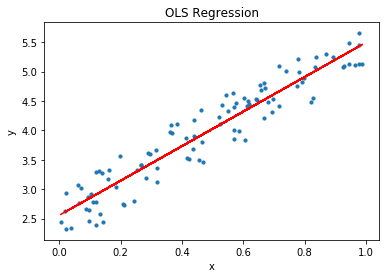

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('OLS Regression')

# predicted values
plt.plot(x, y_predicted, color='r')


The general linear regression method in scikit learn has the interface below:

`sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)`

### 1.2 Ridge regression and Lasso regression

OLS linear regression is a useful technique but it is not always the ideal method. For instance, what about if we have outliers? Or how might **multicollinearity** affect our model when independent variables (features) in a regression model are correlated ? When asking questions like these it becomes clear that OLS is not always the ideal method for regression.

Ridge and Lasso are regularized versions of linear regression. In practice, ridge regression leads to lower weights of coefficients, while lasso regressions leads to more coefficients having zero weights. In this tutorial, we check how to use them with the random data in the previous example:

Slope: [[2.93302231]]
Intercept: [2.5597484]
Root mean squared error:  0.07623428081984178
R2 score:  0.9038642516848568


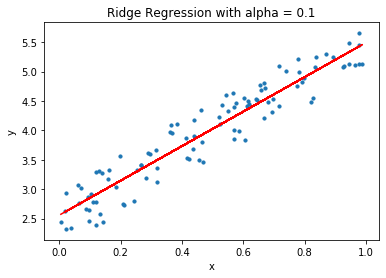

In [2]:
from sklearn.linear_model import Ridge

# Model initialization
ridge_model = Ridge(alpha=0.01)    # set hyperparameter alpha to 0.5
# Fit the data(train the model)
ridge_model.fit(x, y)
# Predict
y_predicted = ridge_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,ridge_model.coef_)
print('Intercept:', ridge_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with alpha = 0.1')

# predicted values
plt.plot(x, y_predicted, color='r')


Here is the interface of ridge regression in scikit learn:

`sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)`

Ridge method can also be used in classification work:
`sklearn.linear_model.RidgeClassifier(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='auto', random_state=None)`

Slope: [2.81623991]
Intercept: [2.61496239]
Root mean squared error:  0.07743635733322499
R2 score:  0.9023483650797316


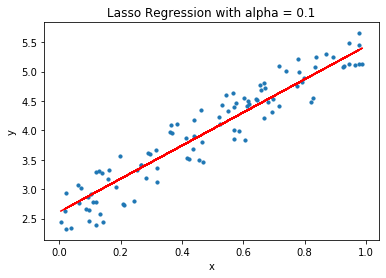

In [3]:
from sklearn.linear_model import Lasso

# Model initialization
lasso_model = Lasso(alpha=0.01)    # set hyperparameter alpha to 0.1
# Fit the data(train the model)
lasso_model.fit(x, y)
# Predict
y_predicted = lasso_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,lasso_model.coef_)
print('Intercept:', lasso_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso Regression with alpha = 0.1')

# predicted values
plt.plot(x, y_predicted, color='r')


Here is the interface of Lasso regression in scikit learn:

`sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`

### 1.3 Hyperparameters tuning

Unlike OLS regression, both Ridge and Lasso regressions need user to input a alpha value, or its default value will be used if there is no input. This alpha is named the **hyperparameter** of a model. The value of alpha determines the prediction quality of models so the value has to be fine tuned. Usually, the hyperparameter tuning is performed through **cross-validation** process.

As for Ridge and Lasso regressions, scikit-learn has two regressors with the built-in cross-validation methods helping to search best alpha parameter for the available data set. In `linear_model.RidgeCV()` implements ridge regression with built-in cross-validation, once the cross-validation process has determined the optimal alpha parameter from the input range, the ridge regression model will use the optimal alpha value to do linear regression. This logic applies to `linear_model.LassoCV()` for Lasso regression. So, let us check how to use them to find the optimal alpha value for each model:

In [4]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=np.linspace(0.01, 1.0, 10))
ridge_cv.fit(x,y)

print(ridge_cv.alpha_)     
print(ridge_cv.score(x,y))    # return the R2-score of the optimal alpha value

0.01
0.9038642516848563


In [5]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.linspace(0.01, 1.0, 10))
lasso_cv.fit(x,y.ravel())   # change the y shape to (100,) a row vector to su

print(lasso_cv.alpha_)   
print(lasso_cv.score(x,y))   # return the R2-score of the optimal alpha value

0.01
0.9023483650797317


Here are the interfaces to the two methods in scikit learn:

`sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), *, fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)`

`sklearn.linear_model.LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')`

Finally, user guide on linear regression and other variations in scikit-learn can be found [here](https://scikit-learn.org/stable/modules/linear_model.html).

## 2. Logistic Regression

### 2.1 Basics
Don’t get confused by its name! <u>It is a classification not a regression algorithm.</u> It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a [logit function](https://en.wikipedia.org/wiki/Logistic_function). Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

<img src="./sigmoid function.png" width="300" height="300" />

Again, let us try and understand this through a simple example.

Let’s say your friend gives you a puzzle to solve. There are only 2 outcome scenarios – either you solve it or you don’t. Now imagine, that you are being given wide range of puzzles / quizzes in an attempt to understand which subjects you are good at. The outcome to this study would be something like this – if you are given a trignometry based tenth grade problem, you are 70% likely to solve it. On the other hand, if it is grade fifth history question, the probability of getting an answer is only 30%. This is what Logistic Regression provides you.

Coming to the math, the log odds of the outcome is modeled as a linear combination of the predictor variables.

$odds= p/(1-p)$ = probability of event occurrence / probability of not event occurrence

$ln(odds) = ln(p/(1-p))$

$logit(p) = ln(p/(1-p)) = b_0+b_1X_1+b_2X_2+b_3X_3....+b_kX_k$

Above, $p$ is the probability of presence of the characteristic of interest. It chooses parameters that maximize the likelihood of observing the sample values rather than that minimize the sum of squared errors (like in ordinary regression).

Now, you may ask, why take a log? For the sake of simplicity, let’s just say that this is one of the best mathematical way to replicate a step function. I can go in more details, but that will beat the purpose of this article.

<img src="./Logistic_Regression.jpg" width="300" height="300" />

And logistic regression is mainly of two types: binary logistic regression and multiclass logistic regression.



### An Example

In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variables.

The binary dependent variable has two possible outcomes:

- ‘1’ for true/success; or
- ‘0’ for false/failure
Let's now see how to apply logistic regression in Python using a practical example.

The example below is to analyse students' exam result to decide he/she can enter a school. If result passes the threshould, the status is "admitted", else, the status is "rejected".

Firstly, import libraries and prepare data. Here, we simply creat 40 entries of data.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])


Now, set the independent variables (represented as X) and the dependent variable (represented as y) :

In [7]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

Then, apply train_test_split. For example, you can set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, while the model training will be based on 75% of the dataset:

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Apply the logistic regression as follows:

In [9]:
logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,y_train)
y_test_pred=logistic_regression.predict(X_test)    # y_test_pred holds the prediction results based on X_test

print(type(y_test_pred))
print(y_test_pred.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(10,)
<class 'pandas.core.series.Series'>
(10,)


### 2.2 Confusion Matrix

Quality evaluation of a logistic regression model is based on "confusion matrix".

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Let's start with an example confusion matrix for a binary classifier (though it can easily be extended to the case of more than two classes):

<img src="./confusion_matrix_simple2.png" width="300" height="300" />

What can we learn from this matrix?

- There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
- The classifier made a total of 165 predictions (e.g., 165 patients were being tested for the presence of that disease).
- Out of those 165 cases, the classifier predicted "yes" 110 times, and "no" 55 times.
- In reality, 105 patients in the sample have the disease, and 60 patients do not.

Let's now define the most basic terms, which are whole numbers (not rates):

- **true positives (TP)**: These are cases in which we predicted "yes" (they have the disease), and they do have the disease.
- **true negatives (TN)**: We predicted "no", and they don't have the disease.
- **false positives (FP)**: We predicted "yes", but they don't actually have the disease. (Also known as a "Type I error.")
- **false negatives (FN)**: We predicted "no", but they actually do have the disease. (Also known as a "Type II error.")

I've added these terms to the confusion matrix, and also added the row and column totals:

<img src="./confusion_matrix2.png" width="400" height="400" />

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

- **Accuracy**: Overall, how often is the classifier correct?
    - (TP+TN)/total = (100+50)/165 = 0.91
- **Misclassification Rate**: Overall, how often is it wrong?
    - (FP+FN)/total = (10+5)/165 = 0.09
    - equivalent to 1 minus Accuracy
    - also known as "Error Rate"
- **True Positive Rate** (**TPR**): When it's actually yes, how often does it predict yes?
    - TP/actual yes = 100/105 = 0.95
    - also known as "**Sensitivity**" or "**Recall**"
- **False Positive Rate** (**FPR**): When it's actually no, how often does it predict yes?
    - FP/actual no = 10/60 = 0.17
- **True Negative Rate**: When it's actually no, how often does it predict no?
    - TN/actual no = 50/60 = 0.83
    - equivalent to 1 minus False Positive Rate
    - also known as "**Specificity**"
- **Precision**: When it predicts yes, how often is it correct?
    - TP/predicted yes = 100/110 = 0.91
- **Prevalence**: How often does the yes condition actually occur in our sample?
    - actual yes/total = 105/165 = 0.64


Then, use the code below to get the Confusion Matrix:

Predicted  0  1
Actual         
0          5  0
1          0  5


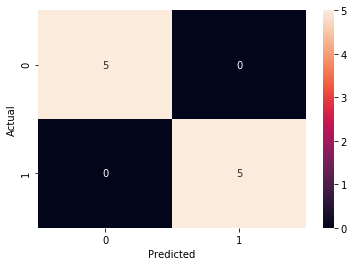

In [10]:
confusion_matrix = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
#plt.xlabel('Predicted classes')
#plt.ylabel('Actual classes')
#plt.show()

For the final part, print the Accuracy:

In [11]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_test_pred))

Accuracy:  1.0


Suppose there are new candidates.

In [12]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])

In [13]:
y_new_pred=logistic_regression.predict(df2)

print (df2)
print (y_new_pred)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]


The first and fourth candidates are not expected to be admitted, while the other candidates are expected to be admitted.

There are also two other important metrics to evaluate the performance of a classfication model.

### 2.3 ROC and AUC

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

### ROC

An **ROC curve** (**receiver operating characteristic curve**) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- **True Positive Rate** (**TPR**)
- **False Positive Rate** (**FPR**)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

<img src="./ROCCurve.svg" width="300" height="300" />

### AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

<img src="./AUC.svg" width="300" height="300" />

**AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.** An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity, which is a no skill classifier. When AUC is 0.7, it means there is 70% chance that model will be able to distinguish between positive class and negative class. In this sense, the higher the AUC value is, the better the classification model is.

To calculate the ROC AUC metrics, we can use the codes below:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


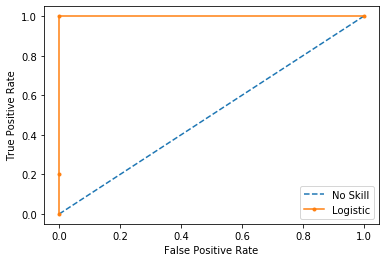

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logistic_regression.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

For the toy data set we have constructed, we have achieved a perfect logistic regression model for classification with AUC value = 1.0!

### 2.4 Precision-Recall curve and F1 score

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve. We can modify the code above two calculdate and plot the precision-recall curve.

Another useful metric in the evaluation of model is **F1 score**:

Logistic: f1=1.000 auc=1.000


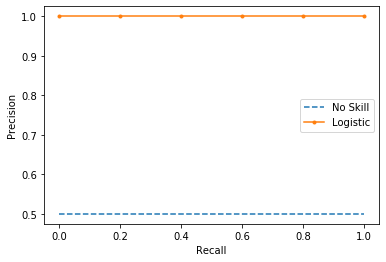

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = logistic_regression.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_test_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

**If your dataset is heavily imbalanced and/or you mostly care about the positive class, you should use F1 score, or Precision-Recall curve to evaluate model.** The additional reason to go with F1 (or Fbeta) is that these metrics are easier to interpret and communicate to business stakeholders. If your dataset is balanced, ROC curve and AUC value are useful to evaludate the classification model.

### 2.5 Hyperparameter tuning in logistic regression

Logistic regression model has several hyperparameters and they have to be set prior to the training process, these hyperparameters has to be fine tuned.

Scikit-learn provides a class `.LogisticRegressionCV()` to help user tune the hyperparameters to achieve the best logistic regression classifier with faster run speed. This method implements Logistic Regression with built-in cross-validation support, to find the two optimal hyperparameters: `C` and/or `l1_ratio`, according to the scoring attribute of this method. 

In [16]:
from sklearn.linear_model import LogisticRegressionCV 

# Set parameters
n_folds = 5
C_values = [0.001, 0.01, 0.05, 0.1, 1., 100.]


# for small data, solver set to 'liblinear'
logreg_cv = LogisticRegressionCV(Cs=C_values, cv=n_folds, solver='liblinear')
logreg_cv.fit(X_train, y_train)

print(logreg_cv.scores_)   # a dictionary of scores of every fold of CV

print()

print(logreg_cv.C_) # the best C_ value 


y_new_pred=logreg_cv.predict(df2)    # the best C_ is used for prediction

print (df2)
print (y_new_pred)


{1: array([[0.5       , 0.5       , 1.        , 1.        , 1.        ,
        1.        ],
       [0.5       , 0.5       , 0.83333333, 0.83333333, 0.83333333,
        0.83333333],
       [0.5       , 0.5       , 0.83333333, 0.83333333, 0.83333333,
        1.        ],
       [0.5       , 0.66666667, 0.83333333, 0.83333333, 1.        ,
        1.        ],
       [0.66666667, 0.83333333, 0.66666667, 0.66666667, 0.66666667,
        1.        ]])}

[100.]
   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]


Here are the interfaces to the two methods in scikit-learn:

`sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`

`sklearn.linear_model.LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)`

Finally, user guide about the metrics to evaludate classification model in scikit-learn can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).